#### About the dataset:

age: Age of the patient;
sex: Sex of the patient;
cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic;
trtbps: Resting blood pressure (in mm Hg);
chol: Cholestoral in mg/dl fetched via BMI sensor;
fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False;
restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy;
thalachh: Maximum heart rate achieved;
oldpeak: Previous peak;
slp: Slope;
caa: Number of major vessels;
thall: Thalium Stress Test result ~ (0,3);
exng: Exercise induced angina ~ 1 = Yes, 0 = No;
output: Target variable

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(303, 14)

#### Checking for null values

In [4]:
data.isnull().sum().sum()

0

No null values found

In [5]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data[data.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
data.drop_duplicates(keep="first", inplace=True)

In [8]:
data.shape

(302, 14)

In [9]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


Number of people having sex as 1 are 96 and sex as 0 are 206


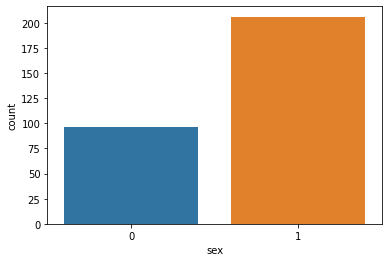

In [11]:
x = data.sex.value_counts()
sns.countplot(data=data, x ="sex")
print(f'Number of people having sex as 1 are {x[0]} and sex as 0 are {x[1]}')

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


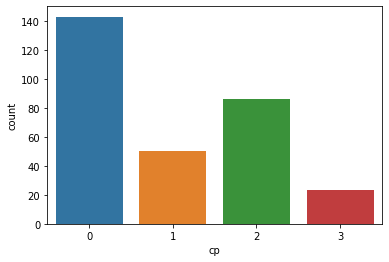

In [12]:
sns.countplot(data=data, x="cp")
x = data.cp.value_counts()
print(x)

It can be observed that people having chest pain of:
    1. type 0 (Typical Angina) is the highest.
    2. type 3 (Asymptomatic) is the lowest.

0    257
1     45
Name: fbs, dtype: int64


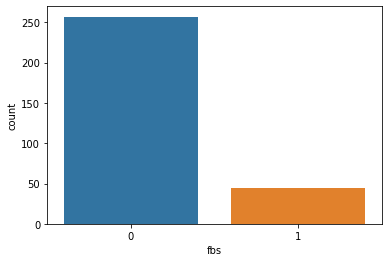

In [13]:
sns.countplot(data=data, x="fbs")
x = data.fbs.value_counts()
print(x)

1    151
0    147
2      4
Name: restecg, dtype: int64


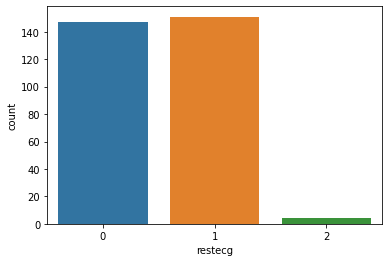

In [14]:
sns.countplot(data=data, x="restecg")
x = data.restecg.value_counts()
print(x)

ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


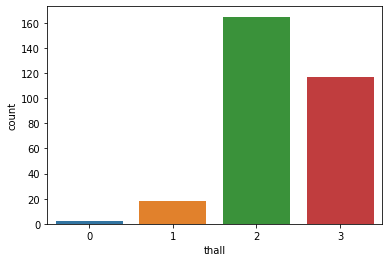

In [15]:
sns.countplot(data=data, x="thall")
x = data.thall.value_counts()
print(x)

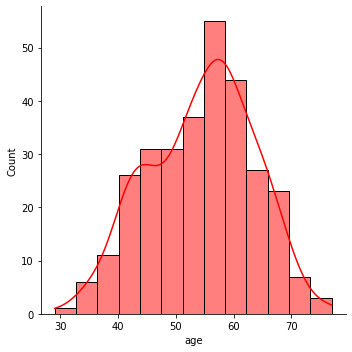

In [16]:
sns.displot(data.age, color="red", label="Age", kde=True)

Density distribution is highest for age group 55 to 60

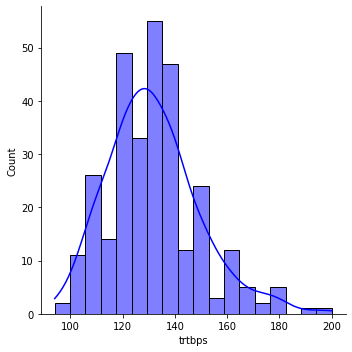

In [17]:
sns.displot(data.trtbps, color="blue", kde=True)

Trtbps has highest count around 130

#### Heartattack vs age

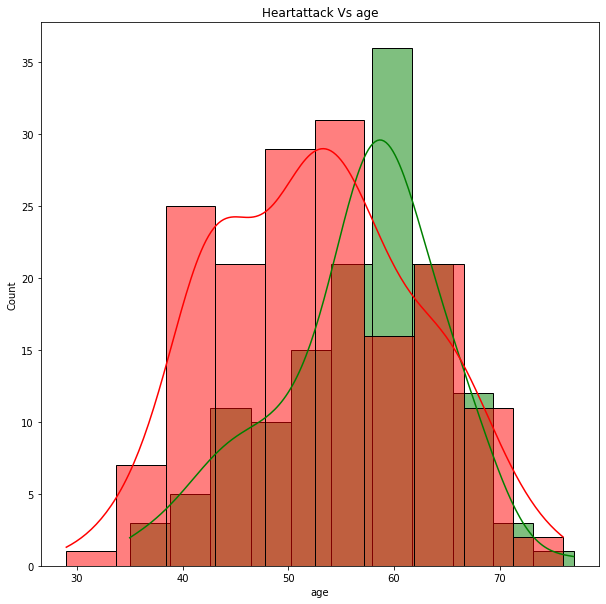

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(data[data['output'] == 0]["age"], color='green', kde=True)
sns.histplot(data[data['output'] == 1]["age"], color='red', kde=True)
plt.title('Heartattack Vs age')
plt.show()

Text(0.5, 1.0, 'Heartattack vs Cholestrol')

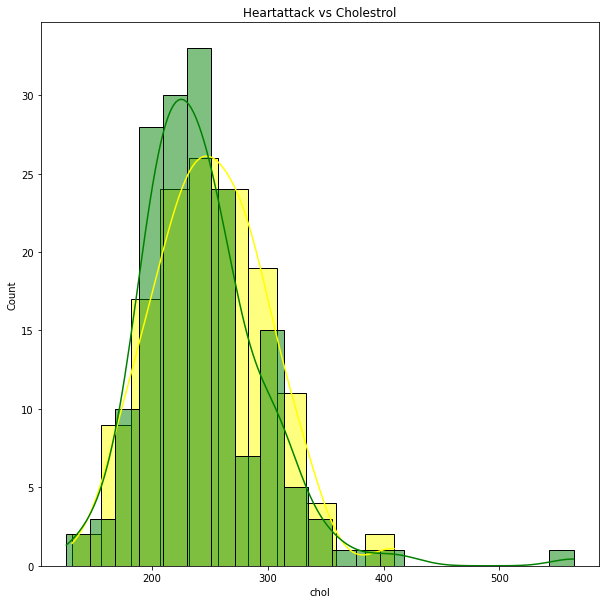

In [19]:
plt.figure(figsize=(10,10))
sns.histplot(data[data["output"] == 0]["chol"], color="yellow", kde=True)
sns.histplot(data[data["output"] == 1]["chol"], color="green", kde=True)
plt.title("Heartattack vs Cholestrol")

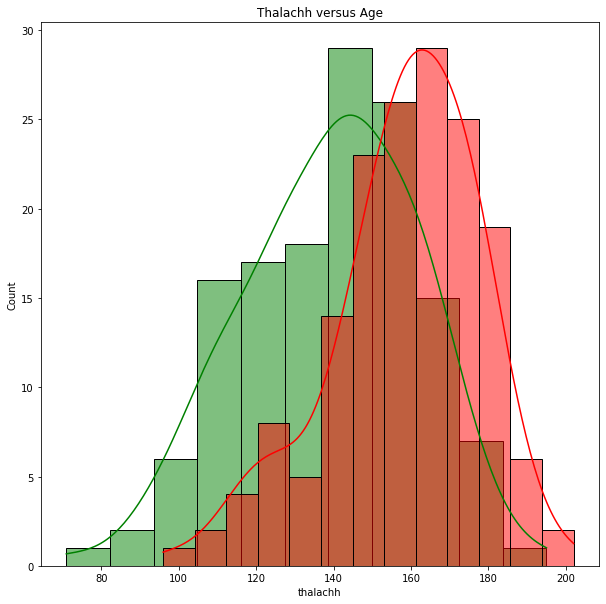

In [20]:
plt.figure(figsize=(10,10))
sns.histplot(data[data['output'] == 0]["thalachh"], color='green',kde=True,) 
sns.histplot(data[data['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

<Figure size 1440x1440 with 0 Axes>

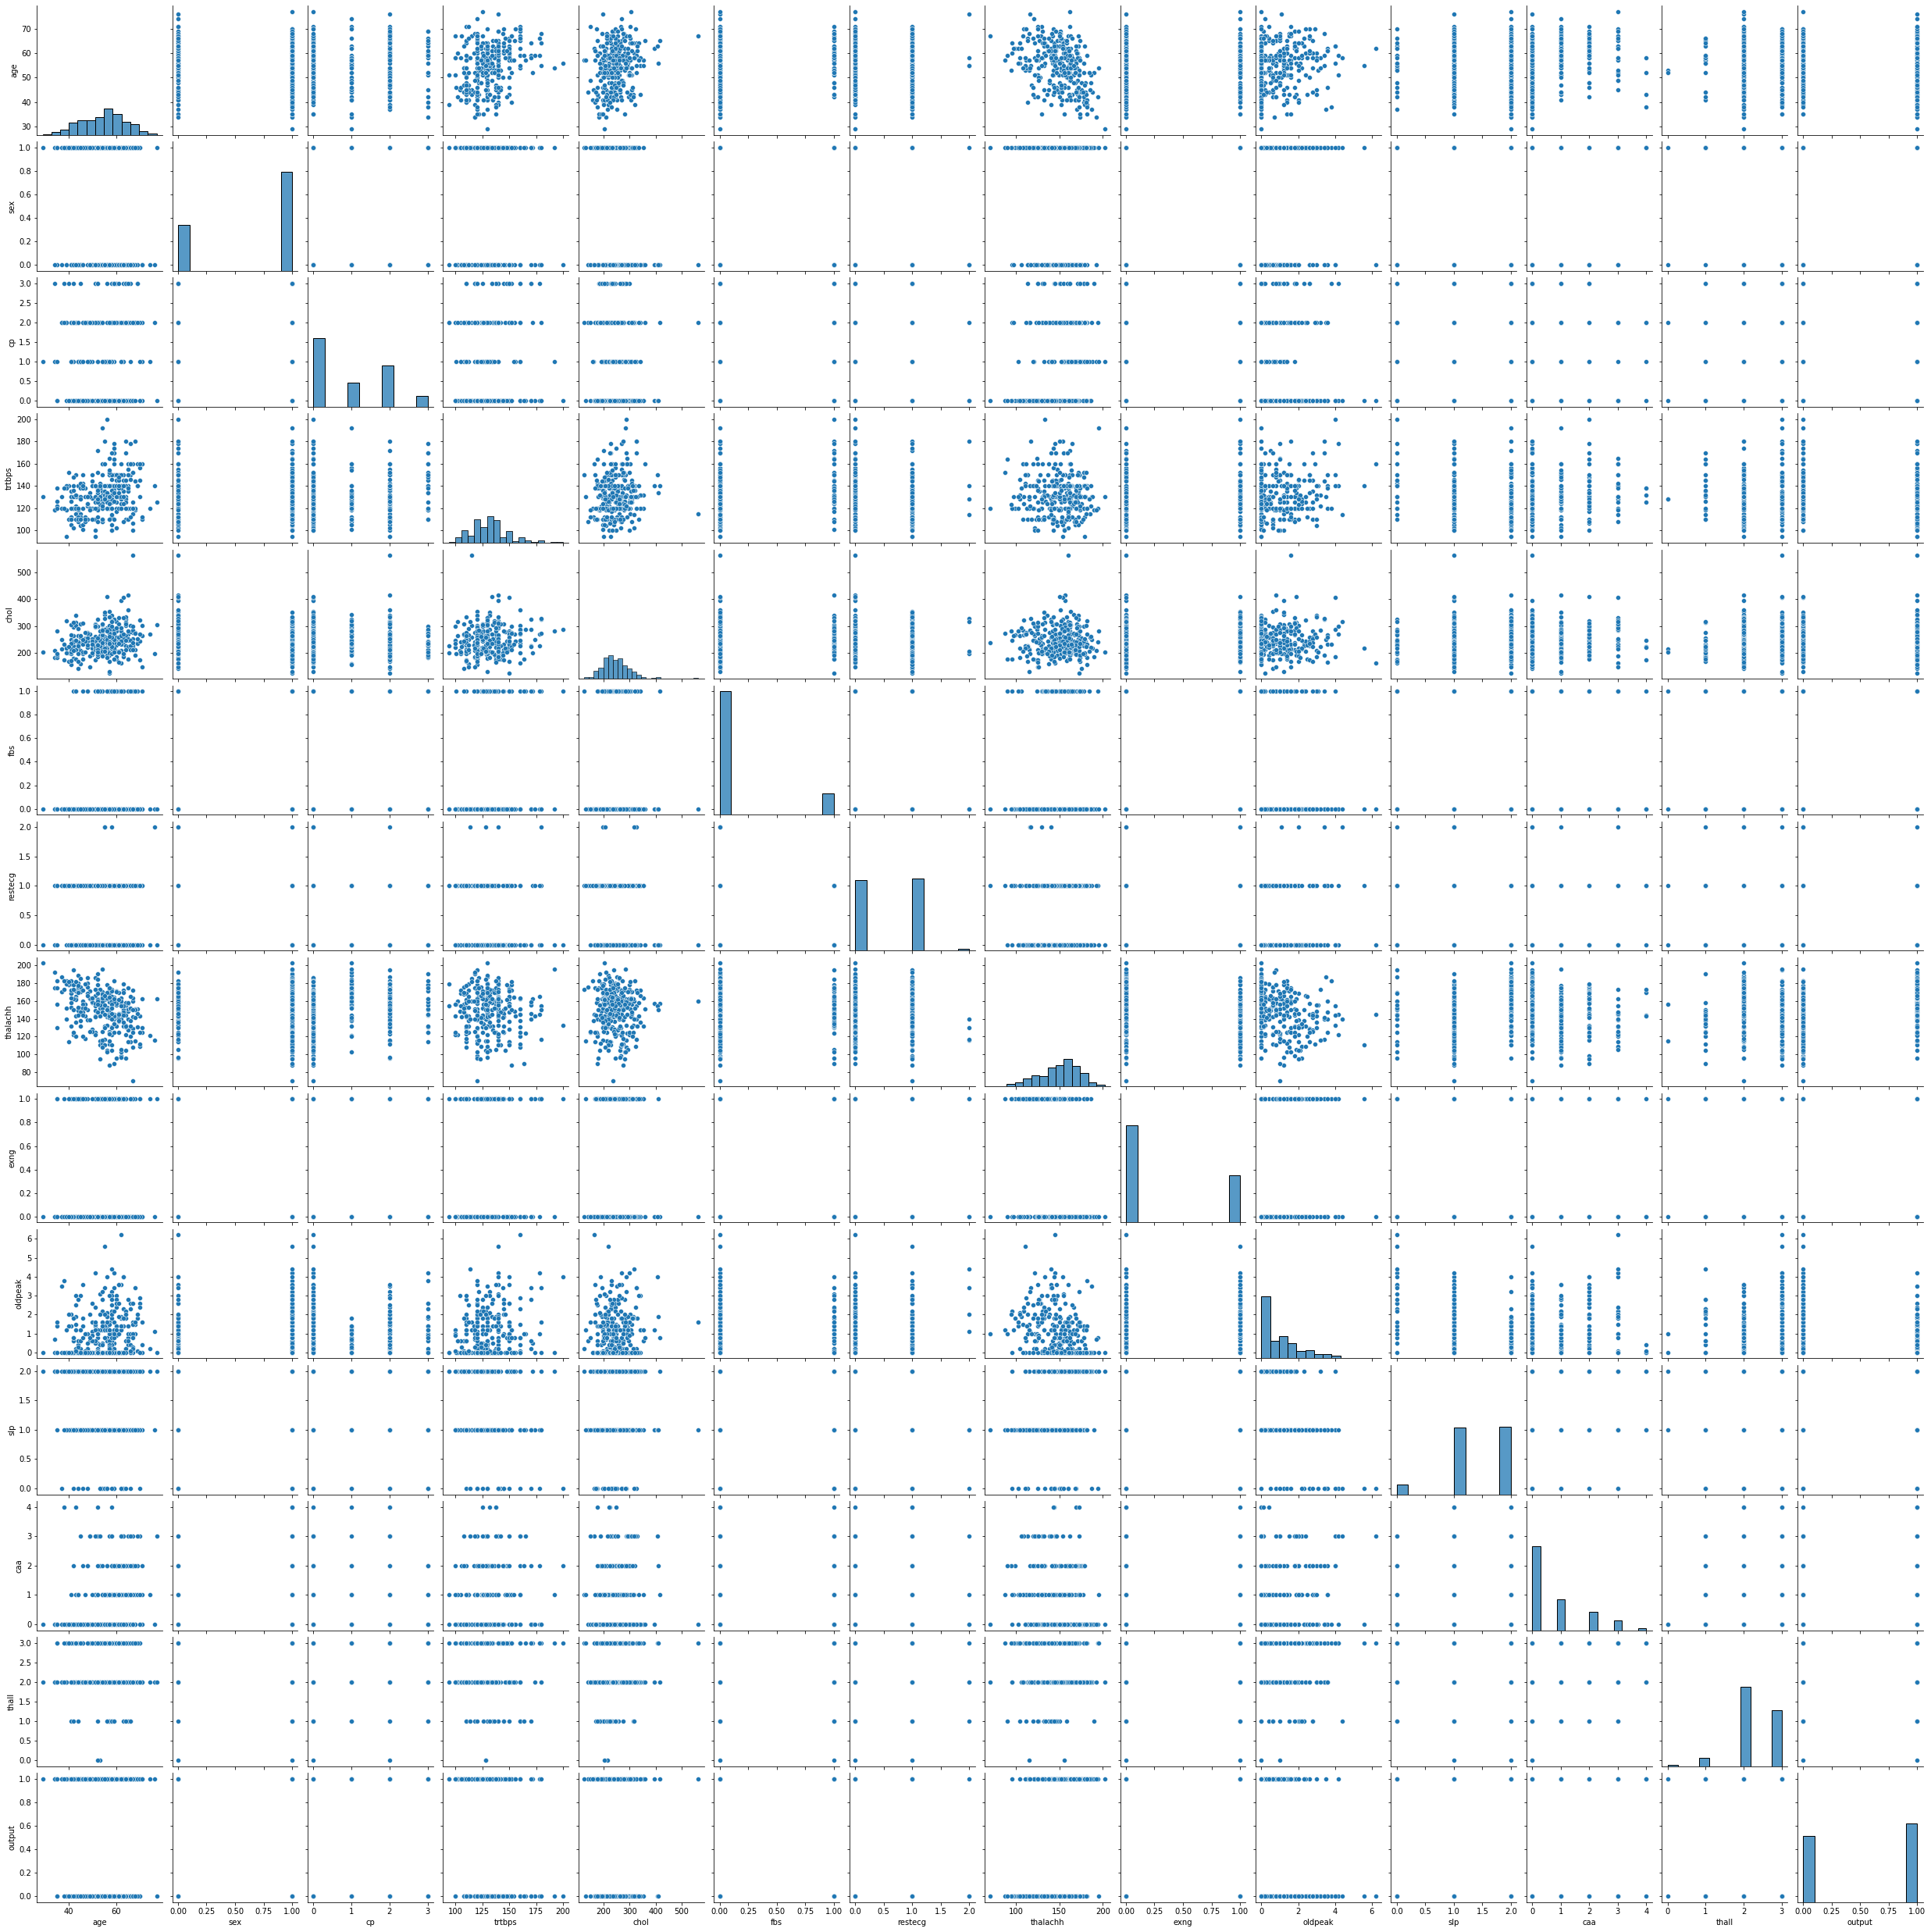

In [21]:
plt.figure(figsize=(20,20))
sns.pairplot(data)
plt.show()

<AxesSubplot:xlabel='fbs', ylabel='output'>

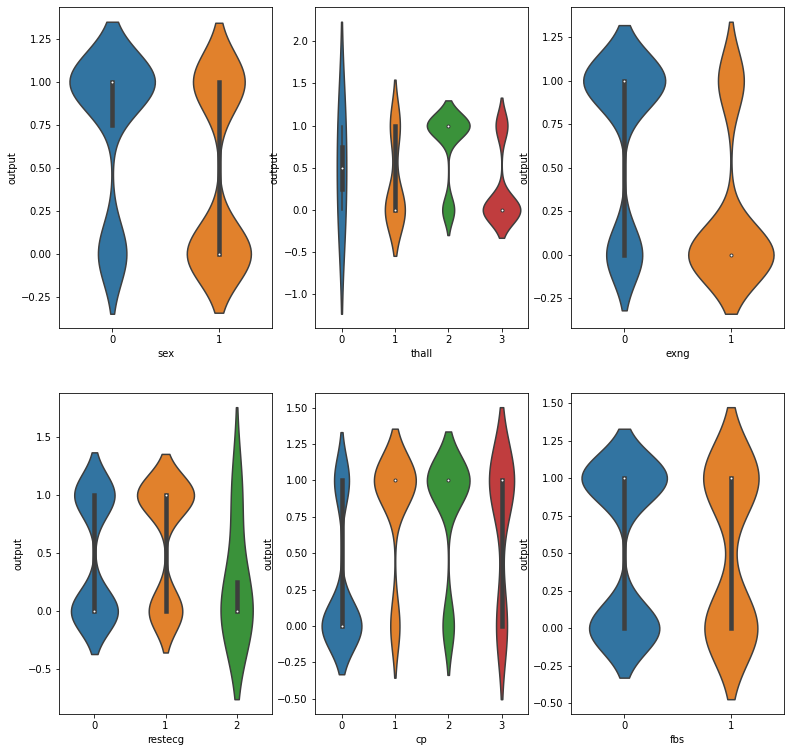

In [22]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x='sex', y='output', data=data)
plt.subplot(2,3,2)
sns.violinplot(x='thall', y='output', data= data)
plt.subplot(2,3,3)
sns.violinplot(x='exng', y='output', data= data)
plt.subplot(2,3,4)
sns.violinplot(x='restecg', y='output', data= data)
plt.subplot(2,3,5)
sns.violinplot(x='cp', y='output', data= data)
plt.subplot(2,3,6)
sns.violinplot(x='fbs', y='output', data= data)

## Data Preprocessing

In [23]:
X = data.drop(labels="output", axis=1).values
y = data["output"].values
X,y

(array([[63.,  1.,  3., ...,  0.,  0.,  1.],
        [37.,  1.,  2., ...,  0.,  0.,  2.],
        [41.,  0.,  1., ...,  2.,  0.,  2.],
        ...,
        [68.,  1.,  0., ...,  1.,  2.,  3.],
        [57.,  1.,  0., ...,  1.,  1.,  3.],
        [57.,  0.,  1., ...,  1.,  1.,  2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [25]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train, X_test

(array([[43.,  0.,  2., ...,  1.,  0.,  2.],
        [66.,  0.,  2., ...,  1.,  1.,  2.],
        [58.,  1.,  2., ...,  2.,  0.,  2.],
        ...,
        [56.,  1.,  3., ...,  1.,  0.,  3.],
        [47.,  1.,  2., ...,  2.,  0.,  2.],
        [58.,  1.,  2., ...,  2.,  2.,  3.]]),
 array([[ 0.81328528,  0.70490738,  0.02781503, -0.67462818,  0.65089023,
         -0.40527917, -0.97525383, -1.96657306, -0.6983225 ,  0.27236593,
         -0.61492051,  0.29516791,  1.1478345 ],
        [ 1.03626794,  0.70490738,  1.94307874,  2.19385084, -0.36856884,
         -0.40527917, -0.97525383,  0.23525787, -0.6983225 , -0.39657867,
         -0.61492051, -0.70674006,  1.1478345 ],
        [ 1.03626794,  0.70490738,  0.98544689, -0.38778028,  1.17949864,
         -0.40527917,  0.90503556, -0.78097179,  1.43200311,  0.60683823,
         -0.61492051, -0.70674006,  1.1478345 ],
        [ 0.36731998,  0.70490738, -0.92981682,  1.04645923,  0.44322264,
         -0.40527917, -0.97525383, -1.62782984,  1

## Logistic Regression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix: \n", conf)
print("The accuracy of Logistic Regression is:", accuracy_score(y_test, predicted))

Confusion Matrix: 
 [[23  4]
 [ 9 25]]
The accuracy of Logistic Regression is: 0.7868852459016393


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### K-Nearest Neighbours

In [28]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix: \n", conf)
print("The accuracy of KNeighbours classifier is:", accuracy_score(y_test, predicted))

Confusion Matrix: 
 [[27  0]
 [34  0]]
The accuracy of KNeighbours classifier is: 0.4426229508196721


In [31]:
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
   
predicted = model.predict(X_test)
   
cm = confusion_matrix(y_test, predicted)

print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of X Gradient Boosting is :  68.85245901639344 %


In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  44.26229508196721 %
